<a href="https://colab.research.google.com/github/luis314159/Neural_networks_TF/blob/master/notebooks/Pima_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>


#**<h1 align="center"> Taller de redes Neuronales con TensorFlow<h1>**


###**<center > La Salle Chihuahua**

</div>

<center>

##<center>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/640px-TensorFlow_logo.svg.png" width="500" height="350"/>

##<center>
##<center>
##<center>
###<center>Estudiante: your name here
###<center>Profesor: Ing. Luis Ángel Almazán López
<center>
Ninguna pérdida debe sernos más sensible que la del tiempo, puesto que es irreparable.


$Zenón \ de\ Citio$


<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/)
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/14400@ulsachihuahua.edu.mx-darkblue?&logoColor=white)
<!-- badges: end -->



<img src="https://static.wixstatic.com/media/50abbb_a6b00299fb4c48f5b029e7792a7a6eea~mv2.jpg/v1/crop/x_460,y_0,w_1621,h_1182/fill/w_594,h_462,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/ULSA%20LOGO999999999.jpg" width=462 />

</div>


### Pima Data Set
The pima dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
# Cargando código de GitHub del curso
!git clone https://github.com/luis314159/Neural_networks_TF

# Agregando datos al path (para que el código pueda ser usado fácilmente
import sys
path_to_add = "/content/Neural_networks_TF/scripts"
sys.path.append(path_to_add)

Cloning into 'Neural_networks_TF'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 127 (delta 61), reused 54 (delta 17), pack-reused 0
Receiving objects: 100% (127/127), 754.84 KiB | 4.08 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv("/content/Neural_networks_TF/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Train and test set

Dividir los datos en conjuntos de entrenamiento y prueba es crucial en el modelado predictivo y machine learning por varias razones fundamentales:

**Evaluación de Generalización:** Al utilizar un conjunto de prueba independiente, que el modelo no ha visto durante el entrenamiento, podemos evaluar cómo se desempeñará el modelo en datos nuevos y reales. Esto ayuda a estimar la capacidad de generalización del modelo fuera de las muestras de entrenamiento.


**Prevenir el Overfitting:** El overfitting ocurre cuando un modelo aprende demasiado bien los detalles y el ruido en el conjunto de entrenamiento, hasta el punto de deteriorar su rendimiento en datos no vistos. Tener un conjunto de prueba separado permite identificar y mitigar el overfitting, ajustando el modelo para que capture tendencias generales y no particularidades específicas de los datos de entrenamiento.


**Ajuste de Hiperparámetros:**
La división en conjuntos de entrenamiento y prueba también facilita el proceso de ajuste de hiperparámetros. Los hiperparámetros son configuraciones del modelo que no se aprenden automáticamente durante el entrenamiento. Utilizar el conjunto de prueba permite a los desarrolladores optimizar estos parámetros sin comprometer la imparcialidad de la evaluación del modelo.

**Validación del Modelo:** El conjunto de prueba sirve como una herramienta de validación final para decidir si un modelo está listo para ser desplegado en producción. Asegura que el modelo sea robusto, confiable y eficiente en la predicción de resultados en condiciones reales.

In [7]:
#datasplit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
print("Train features:", x_train.shape)
print("Test features:", x_test.shape)
print("Train labels:", y_train.shape)
print("Test labels:", y_test.shape)

Train features: (614, 8)
Test features: (154, 8)
Train labels: (614,)
Test labels: (154,)


# Crear modelo de red neuronal

In [9]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(8,)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Especificar el learning rate deseado
learning_rate = 0.01  # Cambia el valor del learning rate según tus necesidades

# Crear el optimizador personalizado con el learning rate especificado
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compilar el modelo con el optimizador y la función de pérdida
modelo.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(x_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
20/20 [==============================] - 3s 13ms/step - loss: 0.6771 - accuracy: 0.5945
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6531
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6531
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6400 - accuracy: 0.6531
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6405 - accuracy: 0.6531
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6322 - accuracy: 0.6531
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.6580
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6580
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.6596
Epoch 10/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6055 - accuracy: 0.6629
Epoch 1

In [10]:
modelo.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7208


[0.5728786587715149, 0.7207792401313782]

### Modelo 2

In [11]:
modelo2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Especificar el learning rate deseado
learning_rate = 0.001  # Cambia el valor del learning rate según tus necesidades

# Crear el optimizador personalizado con el learning rate especificado
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compilar el modelo con el optimizador y la función de pérdida
modelo2.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo2.fit(x_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.8015 - accuracy: 0.6254
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6743
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6922
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6906
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7117
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6710
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.6564
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7150
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6726
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7020
Epoch 11/

In [12]:
modelo2.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.0247 - accuracy: 0.6558


[1.0247372388839722, 0.6558441519737244]

In [13]:
history = modelo2.fit(x_train, y_train, epochs=100, batch_size = 32, validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4210 - accuracy: 0.7736 - val_loss: 1.3791 - val_accuracy: 0.6753
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.7573 - val_loss: 1.0341 - val_accuracy: 0.6558
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.7769 - val_loss: 1.2773 - val_accuracy: 0.7013
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7573 - val_loss: 1.2156 - val_accuracy: 0.6753
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.7704 - val_loss: 1.1010 - val_accuracy: 0.6688
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.7671 - val_loss: 1.0999 - val_accuracy: 0.6688
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.7818 - val_loss: 1.0988 - val_accuracy: 0.6688
Epoch 8/100
2

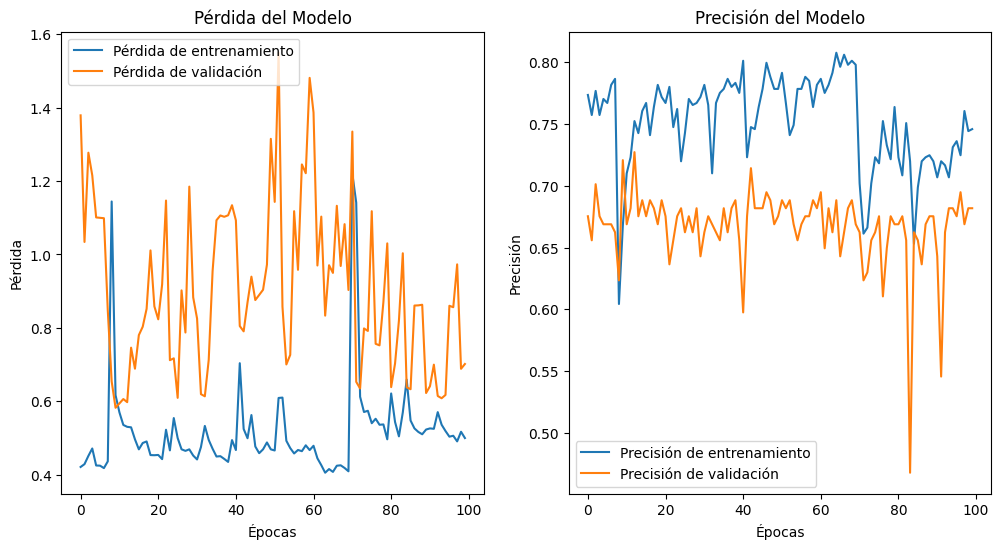

In [14]:
from helper_functions import plot_history

plot_history(history)